### Importing Libraries

In [1]:
#Importing required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### **Importing Data Sets**

In [2]:
# importing dataset

dataset = pd.read_csv("/content/Salary_Data.csv")

In [3]:
dataset.shape

(30, 2)

In [4]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


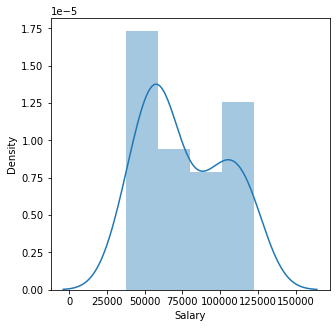

In [6]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(dataset['Salary'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


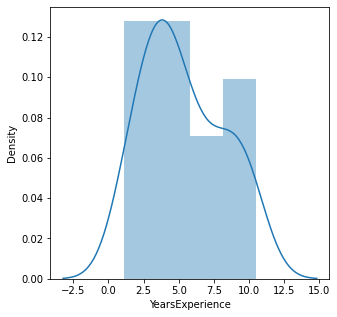

In [7]:
import seaborn as sns
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(dataset['YearsExperience'])
plt.show()

# Cuberoot Transformation of Data

In [31]:
dataset_cbrt=np.cbrt(dataset)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


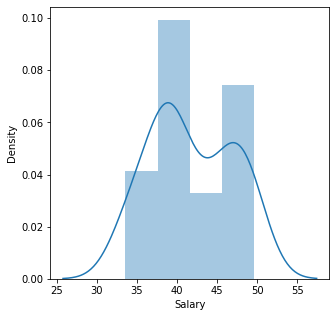

In [32]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(dataset_cbrt['Salary'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


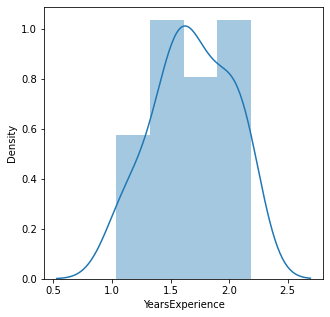

In [33]:
import seaborn as sns
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(dataset_cbrt['YearsExperience'])
plt.show()

In [53]:
dataset_cbrt.head()

,YearsExperience,Salary
0,1.032280,34.011242
1,1.091393,35.883626
2,1.144714,33.540235
3,1.259921,35.175984
4,1.300591,34.168426


**Selection of Independent and Dependent Variables**

In [34]:
#let X = Independent variable which is YearsExperience
X =dataset_cbrt.iloc[:, 0].values

# Let y = Dependent variable which is Salary
y = dataset_cbrt.iloc[:,1].values

In [35]:
X

array([1.03228012, 1.09139288, 1.14471424, 1.25992105, 1.30059145,
       1.42604315, 1.44224957, 1.4736126 , 1.4736126 , 1.54668037,
       1.57406092, 1.58740105, 1.58740105, 1.60052066, 1.65096362,
       1.69849925, 1.72130062, 1.7435134 , 1.80696887, 1.81712059,
       1.89453647, 1.92199734, 1.9916317 , 2.01652968, 2.05671012,
       2.08008382, 2.11791179, 2.12531714, 2.17576711, 2.18975957])

In [36]:
y

array([34.01124196, 35.88362627, 33.54023531, 35.17598439, 34.16842611,
       38.40427108, 39.18127316, 37.90117442, 40.09249429, 38.52750045,
       39.83641525, 38.21165365, 38.47533136, 38.50323243, 39.38883448,
       40.80414222, 40.41831833, 43.63611742, 43.33202494, 45.45868326,
       45.10067993, 46.14713442, 46.61646529, 48.46140693, 47.83144002,
       47.26394426, 48.90541242, 48.2937713 , 49.64968465, 49.57940525])

#Missing Data

In [40]:
dataset_cbrt.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

There is no missing data to handle in the dataset

# OUTLIERS IDENTIFICATION

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


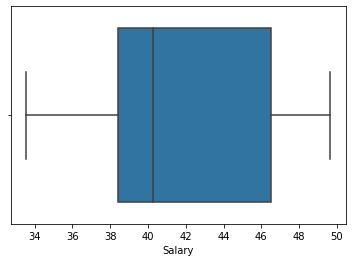

In [41]:
sns.boxplot(dataset_cbrt['Salary'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


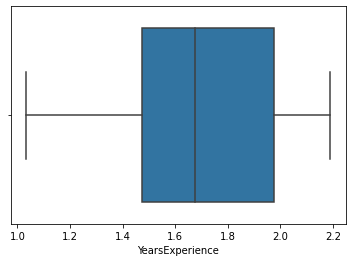

In [42]:
sns.boxplot(dataset_cbrt['YearsExperience'])

As we observed from boxplot of both variables ,there is no outlier detected.so, no need to take any action

# splitting the dataset
As you can see the dataset is very small so,spillting is useless here


# machine learning algorithm

In [43]:
#simple linear regression
dataset_cbrt.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.965631
Salary,0.965631,1.000000


In [44]:
import statsmodels.formula.api as smf
model =smf.ols("Salary~YearsExperience",data=dataset_cbrt).fit()

# visualisation


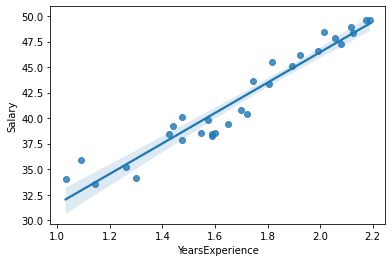

In [45]:
import seaborn as sns 
sns.regplot(x="YearsExperience",y="Salary",data=dataset_cbrt)

In [46]:
model.params

Intercept          16.660277
YearsExperience    14.896252
dtype: float64

In [47]:
# R squred values
(model.rsquared,model.rsquared_adj)

(0.9324434036761003, 0.9300306680931039)

In [48]:
# to check out model working properly or not year of experience 5,7,and 9 are utilised ,last 6 value for future
newdata=pd.Series([5,7,9,11,12,13,14,15,16])

In [49]:
data_pred=pd.DataFrame(newdata,columns=["YearsExperience"])

In [50]:
data_pred

,YearsExperience
0,5
1,7
2,9
3,11
4,12
5,13
6,14
7,15
8,16


In [51]:
model.predict(data_pred)

0     91.141536
1    120.934040
2    150.726544
3    180.519048
4    195.415300
5    210.311551
6    225.207803
7    240.104055
8    255.000307
dtype: float64

For Years of experience 5,7,9,11,12,13,14,15 and 16 we get the predicted values of Salary as 91.141536, 120.934040,150.726544,180.519048,195.415300,210.311551,225.207803,240.104055,255.000307 respectively.